# PHYS381  Assignment\#3
## Due Wednesday Feb 8

Use scipy.integrate.romberg to evaluate the triple integral

  $$ \int_{x=0}^1 \int_{y=0}^\sqrt{1-x^2} \int_{z=0}^\sqrt{1-x^2-y^2} \frac{dz \, dy \, dx}{1 + x^2 + y^2 + z^2} $$
  
Try to obtain results for a range of precision eg. tol=1e-3, 1e-4, ...
See how small you can make the tolerance and still obtain a result in under a minute or so.
(It may be helpful to adjust divmax.)

Determine the number of calls $N$ to the integrand

  $$ \frac{1}{1 + x^2 + y^2 + z^2} $$
  
required for each value of tol.  Plot the graph of N versus tol and discuss the result.

Gisu Ham 10134838  
Justin Park 10115894

In [44]:
import scipy.integrate as SI
import scipy
import math
import numpy
import matplotlib.pyplot as plt
import time

First we attempt to harvest the expected value of the result of integration using simple cartesian to spherical coordinate transformation technique from calculus class. The result is then
$$ \int_{0}^1 \int_{0}^\frac{\pi}{2} \int_{0}^\frac{\pi}{2} \frac{\rho^2 sin\phi d\phi \, d\theta \, d\rho}{1 + \rho^2} $$
Then we make a function to compute this integral using product of Romberg integral (since the integrand is separable)

In [45]:
def R(r):
    return (r**2)/(1+r**2)
def Th(t):
    return math.sin(t)
def Phi(p):
    return 1

def triple_integral_spherical(R,Th,Phi,a1,a2,a3,a4,a5,a6,tol_):
    return scipy.integrate.romberg(R,a1,a2,tol=tol_)*scipy.integrate.romberg(Th,a3,a4,tol=tol_)*scipy.integrate.romberg(Phi,a5,a6,tol=tol_,rtol=rtol_)
print(triple_integral_spherical(R,Th,Phi,0,1,0,math.pi/2,0,math.pi/2,1e-9))

0.337095776639


Thus this result is what we are aiming for (direct input into wolfram alpha in cartesian form also give the same result).

Since romberg integral takes one integrand with respect to a single variable and outputs a number, we cannot compute the triple integral with a single romberg integral. We approach this triple integral problem with functions calling to other functions to work around it.

Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001C38D8B41E0> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.261702 
     2  0.500000  0.307984  0.323411 

The final result is 0.32341143955 after 3 function evaluations.
Time taken:  0.044043540954589844 seconds
Number called to the function N: 27
tol value: 1.0
Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001C38DAF8598> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.261702 
     2  0.500000  0.307984  0.323411 

The final result is 0.32341143955 after 3 function evaluations.
Time taken:  0.000997781753540039 seconds
Number called to the function N: 27
tol value: 0.31622776601683794
Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001C38F07A7B8> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.268810 
     2  0.500000  0.311538  0.325781 

The final result is 0.325780725762 after 3 function evaluations.
Time taken:  0.0010042190551757812 sec

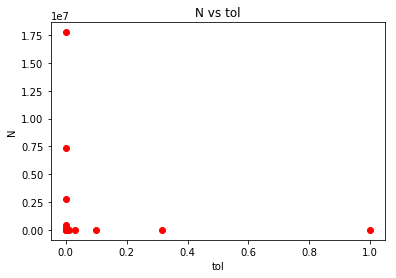

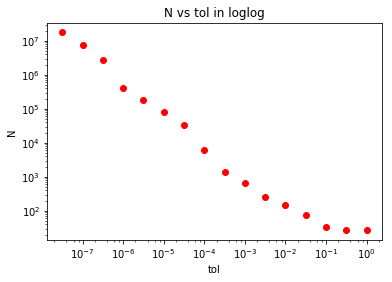

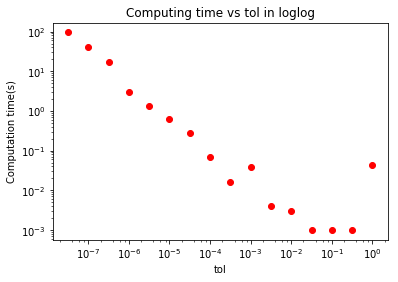

In [46]:
divmax_=20
def fz(z,y,x):
    N.append(1)  #note: using a list to count the number of calls may increase the computation time significantly.
    return 1/(1+x**2+y**2+z**2)
def fy(y,x):
    return SI.romberg(fz,0,numpy.sqrt(numpy.abs(1-x**2-y**2)),args=(y,x),tol=tol_,divmax=divmax_)
def fx(x):
    return SI.romberg(fy,0,numpy.sqrt(numpy.abs(1-x**2)),args=(x,),tol=tol_,divmax=divmax_)

NN=[]  #list collecting values of N- number of call to the integrand
TOL=[] #list collecting tol values.
TIME=[] #list collecting the time consumptions
RESULT=[] #list collecting results of integration
for i in range(0,16): 
    k=i/2   # go up by interval of 0.5
    tol_=10**(-k)
    rtol_=10**(-k)
    N=[] #list used to count the number of calls to the main function
    start = time.time()   #begin time measurement
    RESULT.append(SI.romberg(fx,0,1,tol=tol_,show=True,divmax=divmax_))
    end = time.time()     #end time measurement
    print("Time taken: ",end - start,"seconds")
    print("Number called to the function N:",len(N))
    print("tol value:",tol_)
    NN.append(len(N)) #storing relevant datas as lists
    TOL.append(tol_)
    TIME.append(end-start)
    
plt.plot(TOL,NN,'ro')
plt.xlabel('tol')
plt.ylabel('N')
plt.title('N vs tol')
plt.show()
plt.loglog(TOL,NN,'ro')
plt.xlabel('tol')
plt.ylabel('N')
plt.title('N vs tol in loglog')
plt.show()
plt.loglog(TOL,TIME,'ro')
plt.xlabel('tol')
plt.ylabel('Computation time(s)')
plt.title('Computing time vs tol in loglog')
plt.show()


The 60 second computation time bound seem to be broken when the tol value is between 1e-7 and 1e-8 (see the list below).
Note that this value may be different than other codes since we used list to calculate the number of calls to the 3 variable integrand. Dealing with lists consume more time in general than using arithmetic operation to a single variable to count.

3 plots are shown. The first is the 'regular' plot of N vs tol. Since our tol begins decreasing from the value of 1 and jumps to lower values in exponential fashion, it's hard to recognize any pattern, thus the second plot is N vs tol in log log scale for both x and y axis. The plot we obtained is roughly inversely linear.

Lastly, Computation time vs tol in log log is plotted. The result seems quite similar to N vs tol in log log plot. This somewhat makes sense since time consumsed is rougly(but not directly) proportional to the number of calls to the integrand.

Represented below, as the value of tolerance decreases, N and time consumption increases, and the result becomes more accurate. The result at the lowest tolerance value closely match the theoretical result we obtained in the spherical corodinate case (0.337095776639).  

Anyone who favors low tolerance value must be cautious as the time for computation may explode. The key to numerical integration is keeping the balance between accuracy (tol) and the time consumption.

In [48]:
print('%-30s%-30s%-30s%-30s' % ('Tol','N','Time Consumption (s)','Result'))
for i in range(0,len(TIME)):
    print('%-30s%-30i%-30s%-30s' %(TOL[i],NN[i],TIME[i],RESULT[i]))

Tol                           N                             Time Consumption (s)          Result                        
1.0                           27                            0.044043540954589844          0.32341143955                 
0.31622776601683794           27                            0.000997781753540039          0.32341143955                 
0.1                           33                            0.0010042190551757812         0.325780725762                
0.03162277660168379           75                            0.0009911060333251953         0.332908761624                
0.01                          149                           0.0030171871185302734         0.335071956273                
0.0031622776601683794         253                           0.004000186920166016          0.336282508603                
0.001                         645                           0.039015769958496094          0.336881777805                
0.00031622776601683794        13